In [1]:
%matplotlib inline
projecttitle = 'Analogy'
import sys, os
if sys.platform == 'darwin':
    
    sys.path.append(os.path.join("/Users", "njchiang", "GitHub", "task-fmri-utils"))
else:
    sys.path.append(os.path.join("D:\\", "GitHub", "task-fmri-utils"))

In [2]:
from fmri_core import analysis as pa
from fmri_core import utils as pu
import numpy as np
import matplotlib.pyplot as plt

In [3]:
os.chdir("D:\\CloudStation\\Grad\\Research\\montilab-ucla")

In [4]:
projectSettings = pu.loadConfig(os.path.join('analogy', 'config', 'project.json'))
analysisSettings = pu.loadConfig(os.path.join('analogy', 'config', 'analyses.json'))
# paths = projectSettings['filepaths']['osxPaths']
paths = projectSettings['filepaths']['winPaths']
analysisSettings['searchlight']

Loading JSON config from analogy\config\project.json
Loading JSON config from analogy\config\analyses.json


{'n_jobs': -1, 'process_mask_img': None, 'radius': 5, 'verbose': 0}

In [5]:
paths

{'cloud': 'D:\\CloudStation\\Grad\\Research\\Analogy',
 'code': 'D:\\CloudStation\\Grad\\Research\\montilab-ucla\\analogy',
 'root': 'D:\\fmri\\Analogy'}

In [6]:
sub = "sub-01"
run = "run-01"

In [7]:
funcFile = ("%s_task-analogy_%s_bold.nii.gz" % (sub, run))
eventFile = ("%s_task-analogy_%s_events.tsv" % (sub, run))
maskFile = "aal-LOFC-bin_mask.nii.gz"


In [8]:
img = pu.maskImg(os.path.join(paths['root'], 
                             'derivatives', 
                             sub, 'func',
                             funcFile),
                os.path.join(paths['root'],
                            'derivatives',
                            sub, 'masks',
                            maskFile))
labels = pu.loadLabels(os.path.join(paths['root'],
                                   'derivatives', 
                                   sub, 'func',
                                   eventFile), sep="\t")

Masking D:\fmri\Analogy\derivatives\sub-01\func\sub-01_task-analogy_run-01_bold.nii.gz
Loading label file from: D:\fmri\Analogy\derivatives\sub-01\func\sub-01_task-analogy_run-01_events.tsv


In [9]:
labels.keys()

Index(['Onset', 'Duration', 'TrialTag', 'ABTag', 'CDTag', 'Match', 'ABMainRel',
       'CDMainRel', 'ABSubRel', 'CDSubRel', 'ProbeResp', 'ProbeCorr',
       'ProbeArr', 'AB', 'CD', 'Probe', 'Intensity', 'TrialType'],
      dtype='object')

In [10]:
label = [("%s_%s" % (labels.iloc[i]['TrialTag'], 
                     labels.iloc[i]['TrialType'])) 
         for i in range(len(labels))]

In [11]:
tr = 1.0
frametimes = np.arange(img.shape[0]) * tr

In [12]:
des = pa.make_designmat(frametimes, label, 
                  labels['Onset'].values,
                 labels['Duration'].values)

Creating design matrix...


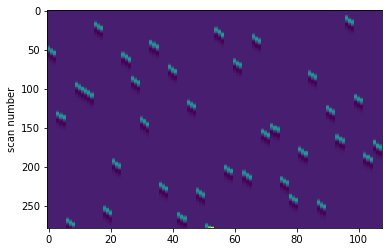

In [13]:
des.show()

In [14]:
sgf = pa.sgfilter(window_length=121, polyorder=3, **analysisSettings['SGF'])


Creating SG filter


In [15]:
from sklearn.linear_model import Ridge, LinearRegression
ols = LinearRegression()
ridge = Ridge()

In [16]:
ols.fit(des.matrix, sgf.fit_transform(img))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
ridge.fit(des.matrix, sgf.fit_transform(img))

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
ols.coef_.shap

In [ ]:
a = des.names
a.remove("constant")

In [ ]:
a

In [ ]:
plt.imshow(pa.rdm(arr.T, square=True))

In [ ]:
arr.shape

In [ ]:
trialtype, trialtag = [], []
for t in des.names:
    curr = t.split('_')
    trialtype += curr[0]
    trialtag += curr[1]


In [ ]:
des.names.index('constant')

In [ ]:
ols.coef_[:, des.names.index("constant")].sum()

In [ ]:
for i in des.names:
    print(i.split('_')[0], i.split('_')[1])